In [1]:
import numpy as np
import pandas as pd
import os
import sys

In [36]:
import re

In [2]:
import wfdb

In [157]:
import scipy.stats as stats
from scipy.fft import fft, fftfreq

## Potential Workflow to extract all files

In [19]:
session1 = os.path.abspath("../../data/gesture-recognition-and-biometrics-electromyogram-grabmyo-1.0.2/Session1/")

In [20]:
part_data_session_1 = [os.path.join(session1, f) for f in os.listdir(session1)]

In [21]:
part_data_session_1

['E:\\DS5500-project\\data\\gesture-recognition-and-biometrics-electromyogram-grabmyo-1.0.2\\Session1\\session1_participant1',
 'E:\\DS5500-project\\data\\gesture-recognition-and-biometrics-electromyogram-grabmyo-1.0.2\\Session1\\session1_participant10',
 'E:\\DS5500-project\\data\\gesture-recognition-and-biometrics-electromyogram-grabmyo-1.0.2\\Session1\\session1_participant11',
 'E:\\DS5500-project\\data\\gesture-recognition-and-biometrics-electromyogram-grabmyo-1.0.2\\Session1\\session1_participant12',
 'E:\\DS5500-project\\data\\gesture-recognition-and-biometrics-electromyogram-grabmyo-1.0.2\\Session1\\session1_participant13',
 'E:\\DS5500-project\\data\\gesture-recognition-and-biometrics-electromyogram-grabmyo-1.0.2\\Session1\\session1_participant14',
 'E:\\DS5500-project\\data\\gesture-recognition-and-biometrics-electromyogram-grabmyo-1.0.2\\Session1\\session1_participant15',
 'E:\\DS5500-project\\data\\gesture-recognition-and-biometrics-electromyogram-grabmyo-1.0.2\\Session1\\se

In [22]:
sample_session_files = [os.path.join(part_data_session_1[0], f) for f in os.listdir(part_data_session_1[0])]

In [60]:

def extract_unique_values_from_folder(folder:str):
    """
    Function to extract just the unique headers of the dat and hea files (removing the file name) 
    """
    unique = set()
    for f in os.listdir(folder):
        unique.add(extract_basename(os.path.join(folder, f)))
        
    return list(unique)
    
    

In [61]:
def extract_basename(filename):
    """
    Function to extract just the unique headers of the dat and hea files (removing the file spec) 
    """
    return os.path.splitext(filename)[0]

In [73]:
def extract_info_from_name(filename):
    parsed = {}
    basename = os.path.basename(filename).split(".")[0]
    pattern = r"session(\d+)_participant(\d+)_gesture(\d+)_trial(\d+)"
    match = re.match(pattern, basename)
    parsed['session'] = match.group(1) 
    parsed['participant'] = match.group(2)
    parsed['gesture'] = match.group(3) 
    parsed['trial'] = match.group(4)
    parsed['filename'] = filename
    return parsed

In [74]:
unique_sample_names = extract_unique_values_from_folder(part_data_session_1[0])

In [75]:
unique_sample_names

['E:\\DS5500-project\\data\\gesture-recognition-and-biometrics-electromyogram-grabmyo-1.0.2\\Session1\\session1_participant1\\session1_participant1_gesture15_trial1',
 'E:\\DS5500-project\\data\\gesture-recognition-and-biometrics-electromyogram-grabmyo-1.0.2\\Session1\\session1_participant1\\session1_participant1_gesture15_trial6',
 'E:\\DS5500-project\\data\\gesture-recognition-and-biometrics-electromyogram-grabmyo-1.0.2\\Session1\\session1_participant1\\session1_participant1_gesture14_trial5',
 'E:\\DS5500-project\\data\\gesture-recognition-and-biometrics-electromyogram-grabmyo-1.0.2\\Session1\\session1_participant1\\session1_participant1_gesture13_trial5',
 'E:\\DS5500-project\\data\\gesture-recognition-and-biometrics-electromyogram-grabmyo-1.0.2\\Session1\\session1_participant1\\session1_participant1_gesture5_trial6',
 'E:\\DS5500-project\\data\\gesture-recognition-and-biometrics-electromyogram-grabmyo-1.0.2\\Session1\\session1_participant1\\session1_participant1_gesture17_trial6',

In [71]:
basename = os.path.basename(unique_sample_names[0]).split(".")[0]

In [72]:
basename

['session1_participant1_gesture15_trial1']

In [78]:
sampled_names = pd.DataFrame(list(map(extract_info_from_name, 
                         unique_sample_names)))

In [81]:
sampled_names['trial'].unique()

array(['1', '6', '5', '4', '7', '3', '2'], dtype=object)

In [82]:
sampled_names

,session,participant,gesture,trial,filename
0,1,1,15,1,E:\DS5500-project\data\gesture-recognition-and...
1,1,1,15,6,E:\DS5500-project\data\gesture-recognition-and...
2,1,1,14,5,E:\DS5500-project\data\gesture-recognition-and...
3,1,1,13,5,E:\DS5500-project\data\gesture-recognition-and...
4,1,1,5,6,E:\DS5500-project\data\gesture-recognition-and...
...,...,...,...,...,...
114,1,1,6,7,E:\DS5500-project\data\gesture-recognition-and...
115,1,1,7,2,E:\DS5500-project\data\gesture-recognition-and...
116,1,1,6,5,E:\DS5500-project\data\gesture-recognition-and...
117,1,1,12,6,E:\DS5500-project\data\gesture-recognition-and...


## Playing around with a waveform

In [149]:
wave = wfdb.rdrecord(sampled_names['filename'][4])

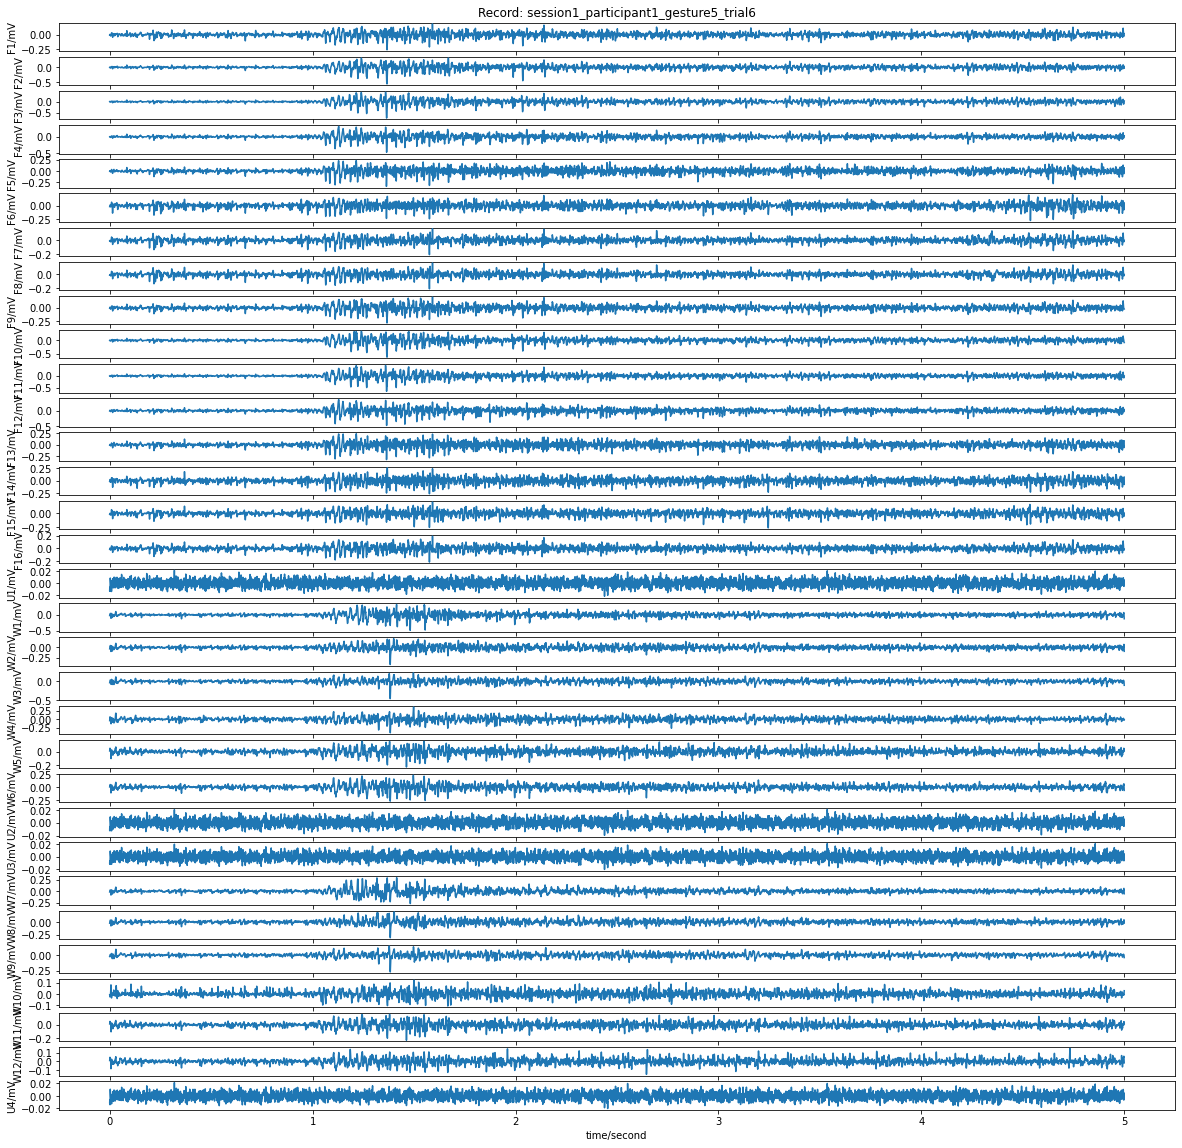

In [150]:
wfdb.plot_wfdb(wave, figsize=(20,20))

In [151]:
wave_df = wave.to_dataframe()

In [152]:
wave.p_signal.shape

(10240, 32)

In [153]:
diff = wave_df.index[101] - wave_df.index[50]

In [154]:
diff.microseconds



24902

In [155]:
wave_df_mean = wave_df.mean()

<AxesSubplot:>

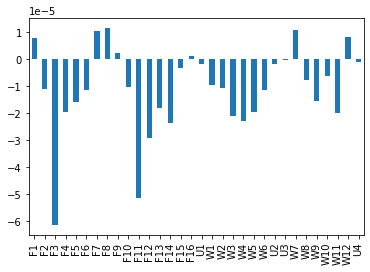

In [156]:
wave_df_mean.plot.bar()

## Extracting some features

In [132]:
def extract_250ms_sample(df, start_index=0):
    return df.iloc[start_index:start_index+50]

In [135]:
subsample_df = extract_250ms_sample(wave_df,30)

In [136]:
subsample_df

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,W6,U2,U3,W7,W8,W9,W10,W11,W12,U4
0 days 00:00:00.014648430,0.035942,0.017556,0.001244,0.011786,0.007260,0.129481,0.105040,0.059450,0.032176,0.010318,...,-0.274752,0.003335,0.001497,-0.168457,-0.142740,-0.087779,0.009875,-0.205061,-0.251951,0.005623
0 days 00:00:00.015136711,0.006764,-0.000082,-0.015508,-0.007672,-0.018745,0.022328,0.056785,0.034494,0.007046,-0.008236,...,-0.254057,0.001643,0.000574,-0.170320,-0.161793,-0.109508,-0.013283,-0.199979,-0.237199,0.002847
0 days 00:00:00.015624992,-0.039717,-0.034434,-0.039772,-0.034365,-0.039248,-0.050596,-0.017134,-0.016651,-0.041014,-0.047901,...,-0.233984,-0.004494,-0.005997,-0.155019,-0.149330,-0.115180,-0.023908,-0.235387,-0.222477,-0.005248
0 days 00:00:00.016113273,-0.070065,-0.063612,-0.058302,-0.052616,-0.054247,-0.090817,-0.081104,-0.062031,-0.078289,-0.077672,...,-0.222168,-0.007351,-0.009041,-0.136952,-0.109355,-0.104493,-0.024640,-0.260376,-0.220001,-0.008659
0 days 00:00:00.016601554,-0.068621,-0.068278,-0.058827,-0.048166,-0.049070,-0.089671,-0.100979,-0.071717,-0.080776,-0.075882,...,-0.209647,-0.003875,-0.006024,-0.112658,-0.059683,-0.080914,-0.019903,-0.248022,-0.218105,-0.004906
0 days 00:00:00.017089835,-0.054090,-0.057283,-0.049982,-0.030587,-0.020851,-0.049787,-0.092967,-0.056588,-0.064901,-0.061675,...,-0.185747,0.000957,-0.002069,-0.073477,-0.009903,-0.045350,-0.001062,-0.211751,-0.204943,0.000544
0 days 00:00:00.017578116,-0.042309,-0.046862,-0.046840,-0.018808,0.006730,-0.002039,-0.083375,-0.043436,-0.053461,-0.055021,...,-0.150686,0.006969,0.004306,-0.033567,0.033664,-0.014303,0.020839,-0.162659,-0.181568,0.006541
0 days 00:00:00.018066397,-0.024450,-0.034419,-0.048262,-0.015336,0.013772,0.019868,-0.065735,-0.033170,-0.039623,-0.044653,...,-0.100921,0.009088,0.008492,-0.013703,0.052378,-0.006275,0.021499,-0.069605,-0.143380,0.008117
0 days 00:00:00.018554678,0.010063,-0.007942,-0.035419,-0.002864,0.015181,0.016063,-0.028528,-0.005939,-0.005393,-0.013807,...,-0.017405,0.002774,0.003837,-0.006624,0.036759,-0.018132,0.004728,0.097181,-0.074266,0.002190
0 days 00:00:00.019042959,0.055042,0.031761,0.001745,0.031029,0.034877,0.027868,0.023060,0.042749,0.047356,0.033028,...,0.104463,-0.001289,-0.000762,0.012346,0.010971,-0.038223,-0.019849,0.267812,0.029749,-0.001256


In [145]:
np.fft.fft(subsample_df.values).shape

(50, 32)

Refering to this link for some examples of feature extraction from a signal: [Link](https://matteogambera.medium.com/how-to-extract-features-from-signals-15e7db225c15)

In [158]:
vals = subsample_df.values

In [159]:
vals

array([[ 3.59418348e-02,  1.75564862e-02,  1.24389905e-03, ...,
        -2.05060739e-01, -2.51951324e-01,  5.62285580e-03],
       [ 6.76390826e-03, -8.21094169e-05, -1.55083517e-02, ...,
        -1.99979093e-01, -2.37199002e-01,  2.84651253e-03],
       [-3.97172073e-02, -3.44337036e-02, -3.97724604e-02, ...,
        -2.35387444e-01, -2.22477254e-01, -5.24779176e-03],
       ...,
       [-4.74339820e-02, -5.26993166e-02, -6.77036481e-02, ...,
         2.10515350e-01,  2.40103604e-01, -6.63192711e-04],
       [-4.24169956e-02, -4.75861393e-02, -5.95617634e-02, ...,
         1.51330490e-01,  2.24143578e-01,  1.71076397e-03],
       [-2.86004317e-02, -3.50980435e-02, -4.36899347e-02, ...,
         8.98379092e-02,  1.62122674e-01, -1.81881222e-03]])

In [170]:
np.sqrt(np.mean(vals**2, axis = 0)).shape

(32,)

In [174]:
np.max(np.abs(vals), axis = 0)/np.sqrt(np.mean(vals**2, axis = 0))

array([2.72761837, 2.74608857, 2.79620239, 2.70474804, 2.44697045,
       2.18252172, 2.59789608, 2.68007589, 2.65563194, 2.74585993,
       2.69367064, 2.7631383 , 2.67005433, 2.47044553, 2.7465743 ,
       2.73006168, 2.0700705 , 1.97607781, 1.6991656 , 1.83374755,
       1.91012345, 2.11100666, 1.91298695, 2.2569576 , 2.09949962,
       2.15349644, 1.85953985, 2.00408834, 2.03685983, 2.08328426,
       1.7428808 , 2.32554204])

In [175]:
np.abs(vals**2) / 50

array([[2.58363098e-05, 6.16460417e-06, 3.09456967e-08, ...,
        8.40998132e-04, 1.26958939e-03, 6.32330147e-07],
       [9.15009098e-07, 1.34839127e-10, 4.81017947e-06, ...,
        7.99832750e-04, 1.12526733e-03, 1.62052672e-07],
       [3.15491311e-05, 2.37135989e-05, 3.16369721e-05, ...,
        1.10814497e-03, 9.89922569e-04, 5.50786367e-07],
       ...,
       [4.49996530e-05, 5.55443595e-05, 9.16756792e-05, ...,
        8.86334250e-04, 1.15299481e-03, 8.79649143e-09],
       [3.59840304e-05, 4.52888131e-05, 7.09520732e-05, ...,
        4.58018341e-04, 1.00480687e-03, 5.85342671e-08],
       [1.63596939e-05, 2.46374531e-05, 3.81762078e-05, ...,
        1.61416999e-04, 5.25675229e-04, 6.61615577e-08]])

In [178]:
def extract_features(df):
    """
    Extracting the following features:
    'MIN','MAX','MEAN','RMS','VAR','STD','POWER','PEAK','P2P','CREST FACTOR','SKEW','KURTOSIS',
            'MAX_f','SUM_f','MEAN_f','VAR_f','PEAK_f','SKEW_f','KURTOSIS_f'
    These will be an array of values for each of the 32 sensors
    """
    #time data
    features = {}
    #time domain features
    time_data = df.values
    features['mean'] = np.mean(time_data, axis = 0)
    features['min'] = np.min(time_data, axis = 0)
    features['max'] = np.max(time_data, axis = 0)
    features['rms'] = np.sqrt(np.mean(time_data**2, axis = 0))
    features['max'] = np.std(time_data, axis = 0)
    features['power'] = np.mean(time_data**2, axis = 0)
    features['peak'] = np.max(np.abs(time_data), axis = 0)
    features['p2p'] = np.ptp(time_data, axis = 0)
    features['crest_factor'] = np.max(np.abs(time_data), axis = 0)/np.sqrt(np.mean(time_data**2, axis = 0))
    features['skew'] = stats.skew(time_data, axis = 0)
    features['kurtosis'] = stats.kurtosis(time_data, axis = 0)
    features['form_factor'] =np.sqrt(np.mean(time_data**2, axis = 0)) / np.mean(time_data, axis = 0)
    features['pulse_indicator'] = np.max(np.abs(time_data), axis = 0)/np.mean(time_data, axis = 0) 
    
    #Convert to frequency domain
    freq_data = fft(time_data)
    S_f = np.abs(freq_data**2)/len(df)
    features['max_f'] = np.max(S_f, axis = 0)
    features['sum_f'] = np.sum(S_f, axis = 0)
    features['mean_f'] = np.mean(S_f, axis = 0)
    features['var_f'] = np.var(S_f, axis = 0)
    features['peak_f'] = np.max(np.abs(S_f), axis = 0)
    features['skew_f'] = stats.skew(S_f, axis = 0)
    features['kurtosis_f'] = stats.kurtosis(S_f, axis = 0)
    
    return features
    

In [179]:
feat = extract_features(subsample_df)

In [185]:
pd.DataFrame(feat).transpose().info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, mean to kurtosis_f
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       19 non-null     float64
 1   1       19 non-null     float64
 2   2       19 non-null     float64
 3   3       19 non-null     float64
 4   4       19 non-null     float64
 5   5       19 non-null     float64
 6   6       19 non-null     float64
 7   7       19 non-null     float64
 8   8       19 non-null     float64
 9   9       19 non-null     float64
 10  10      19 non-null     float64
 11  11      19 non-null     float64
 12  12      19 non-null     float64
 13  13      19 non-null     float64
 14  14      19 non-null     float64
 15  15      19 non-null     float64
 16  16      19 non-null     float64
 17  17      19 non-null     float64
 18  18      19 non-null     float64
 19  19      19 non-null     float64
 20  20      19 non-null     float64
 21  21      19 non-null     float64
 22